# **CUSTOMER LIFETIME VALUE PREDICTION**
By: Kenshi Poneva 

# **1. Problem Framing and Data Understanding**

## 1.1 Context

**What is Customer Lifetime Value?**

Customer Lifetime Value (CLV) is the total amount of money a customer will spend on our business over their lifetime. It includes all the purchases they make before they stop being our customer. CLV is an important metric because it shows how valuable our customers are to our business.

CLV is crucial because it helps us focus on retaining our most valuable customers. Retaining customers is more cost-effective than acquiring new ones, so it is essential to ensure that our current customers are happy with our product or service. By understanding CLV, we can identify our most valuable customers and focus our marketing efforts on keeping them engaged.

**How do you determine the lifetime value of a customer?**

Customer lifetime value (CLV) can be calculated in various ways, but here is a simple and straightforward method that is easy for small retailers and e-commerce owners to use.

**CLV Formula**

$ CLV = \frac{\text{Customer Value}}{\text{Churn Rate}} \times \text{Profit Margin}$

$ \text{Customer Value} = \text{Average Order Value} \times \text{Purchase Frequency}$

*Example*

Let's say an online retail business has a Customer Value of $1,000 per year per customer. During the year, they lose 20% of their customers (Churn Rate = 20%). The profit margin for the business is 25%.

Using the formula, we can calculate the CLV for this business:

$ CLV = \left( \frac{\$1,000}{20\%} \right) \times 25\% = (\$5,000) \times 25\% = \$1,250 $

So, the Customer Lifetime Value for this online retail business is USD1,250. This means that, on average, each customer is expected to bring in USD1,250 in profit over the duration of their relationship with the business.

*Source: [Treasure Data](https://www.treasuredata.com/glossary/customer-lifetime-value-clv/)*


## *1.2 Problem Understanding and Problem Statement*

The marketing team of a company is planning a new campaign and aims to allocate their budget effectively. To optimise this campaign, it's crucial to identify customers who are likely to spend the most and those with lower values. This targeted approach ensures that marketing strategies are used efficiently and avoids alienating customers who may not be interested.

Therefore, this project aims to develop a Machine Learning model for forecasting customers' CLV. The model's predictions will inform marketing decisions, focusing on customer retention and acquisition efforts.

## *1.3 Machine Learning Task*

This project aims to develop a Machine Learning model to support the company's marketing efforts:

1. CLV forecasting: This model will predict the total amount of money each customer is likely to spend over a given period of time. This information can be used to allocate marketing budgets effectively.

2. Customer segmentation: This model will categorise customers into high-value, medium-value, and low-value groups based on their predicted CLV. This information can be used to develop targeted marketing strategies for each customer segment.

## *1.4 Analytics Approach*

The following analytics approach will be used to develop the CLV forecasting model:

1. Data cleaning & preparation.
2. Feature engineering to capture customer behavior and purchase patterns.
3. Evaluate different machine learning models to find the best performing one. 
4. Hyperparameter tuning to improve model performance.
5. Evaluate and interpret the model to understand the most important factors that influence CLTV.

## *1.5 Expected Outcomes*

The expected outcomes of this project are as follows:

1. A Machine Learning model that can predict CLV with high accuracy and group customers into correct segments.
2. A clear understanding of the most important factors that influence CLTV.
3. Concrete recommendations on how businesses can use the model to acquire and retain valuable customers.

## *1.6 Metric Analysis*

The best metric for evaluating the performance of a machine learning model for predicting CLV is the Median Absolute Error (MedAE). Since we have a large amount of data with over 1,000,000 rows and 8 features, and the data distribution is probably not normal, MedAE is the more robust metric. This means that MedAE is less affected by outliers or large errors.

MedAE measures how close the model's predictions are to the actual CLV values. A lower MedAE indicates a better model. In this case, we are forecasting the lifetime value of customers for marketing decisions, which is a numerical value.

Note: MedAE is also aligned with our goal to minimize the error for the most valuable customers. This is because MedAE is less sensitive to large errors, which are more likely to occur for high-value customers.

## *1.7 Data Understanding*

I am using a public dataset from the UCI Machine Learning Repository, which can be found here:  https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#. 

This is a transactional data set that contains all the transactions occurring from  2009 to 2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Attribute Information:

1) `Invoice`: Invoice number. Object, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter ‘c’, it indicates a cancellation.

2) `StockCode`: Product (item) code. Object, a 5-digit integral number uniquely assigned to each distinct product.

3) `Description`: Product (item) name. Object.

4) `Quantity`: The quantities of each product (item) per transaction. Numeric.

5) `InvoiceDate`: Invoice date and time. Numeric, the day and time when each transaction was generated.

6) `Price`: Unit price. Numeric, Product price per unit in sterling.

7) `Customer ID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8) `Country`: Country name. Object, the name of the country where each customer resides.


# **2. Data Wrangling**

Let us import packages and look at the data.

## *2.1 Import Libraries*

In [1]:
# Data manipulation/cleaning
import numpy as np
import pandas as pd
import missingno as msno

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Model Evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")


In [2]:
# Import data

df = pd.read_excel("online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [3]:
df1 = df['Year 2009-2010']
df2 = df['Year 2010-2011']

In [4]:
# Check number of rows and columns
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [52]:
# Check total observations of 2 dataframes
sum([df1.shape[0], df2.shape[0]])

1067371

In [6]:
# Combine 2 dataframes into 1 df
df = df1.append(df2)
df_retail = df.copy()

In [7]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df_retail.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
list_item = []
for col in df_retail.columns:
    list_item.append([col, df_retail[col].dtype, len(df_retail), 
    df_retail[col].isna().sum(), round((df_retail[col].isna().sum()/len(df_retail[col]))*100,2),
    df_retail[col].nunique(), list(df_retail[col].drop_duplicates().sample(2, replace=True).values)])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)

df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,Quantity,int64,1067371,0,0.00,1057,"[720, 698]"
1,InvoiceDate,datetime64[ns],1067371,0,0.00,47635,"[2011-03-04T12:15:00.000000000, 2010-11-24T16:..."
2,Price,float64,1067371,0,0.00,2807,"[76.6, 225.68]"
3,Customer ID,float64,1067371,243007,22.77,5942,"[14989.0, 17261.0]"
4,Invoice,object,1067371,0,0.00,53628,"[505988, C504425]"
5,StockCode,object,1067371,0,0.00,5305,"[79323G, 22950]"
6,Description,object,1067371,4382,0.41,5698,"[FLOWER FAIRY SUMMER BOUQUET SACHET, AMBER VIN..."
7,Country,object,1067371,0,0.00,43,"[Brazil, Thailand]"


## *2.2 Missing Values*

Based on the output above:
1.  The number of missing value in the dataset is 247,389 that comprises roughly 23.17%. The features that have missing values are detailed below:
    - `Customer ID`: 243,007 (22.77%)
    - `Description`: 4382 (0.41%)
2. The number of unique customers: 5,942
3. The number of purchases: 53,628
4. The number of products: 5,698
5. The number of countries who have been working with the company: 43

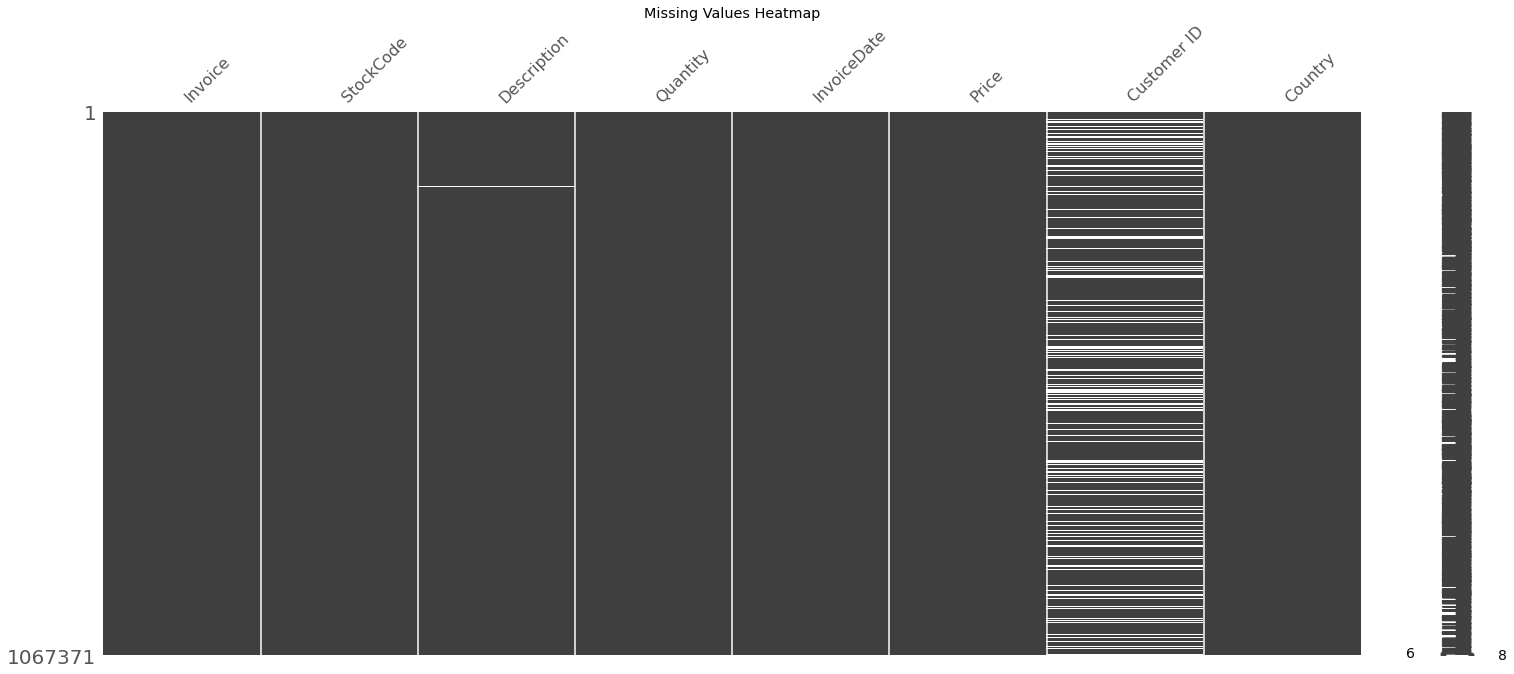

In [10]:
# plot missing values heatmap
msno.matrix(df_retail)
plt.title('Missing Values Heatmap')
plt.show()

## *2.3 Duplicate Values*

After reviewing the data, we found that there are no actual duplicates in the dataset. The rows that appear to be duplicates are related to items purchased together in a single invoice.

In [12]:
df_retail.duplicated().sum()

34335

In [13]:
# Let's get the duplicated rows
duplicates = df_retail[df_retail.duplicated()]
duplicates[:20]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
390,489517,84951A,S/4 PISTACHIO LOVEBIRD COASTERS,1,2009-12-01 11:34:00,2.55,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
657,489529,22028,PENNY FARTHING BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom
658,489529,22036,DINOSAUR BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom


## *2.4 Inconsistent Data*

The chart below shows two things:

- The data contains negative values.
- The chart shows outliers, which are products with significantly higher prices than most other products.


### Negative values

Here is a breakdown of the negative values in the 'Price' and 'Quantity' features:

- `Price`: There are 5 negative values in the 'Price' feature. These values could be due to canceled or refunded orders. The average unit price of all products after excluding negative values is £4.80.

- `Quantity`: There are 22,950 rows with negative Quantity values, making up roughly 2% of the total records in the dataset. On average, customers tend to make orders consisting of fewer than 50 items per order, with the typical quantity per order being approximately 11 items.

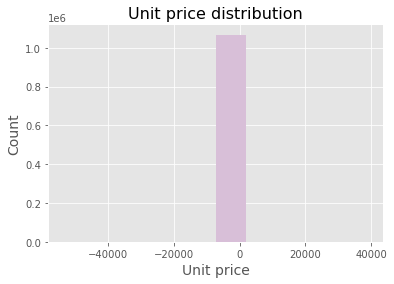

In [14]:
# Price distribution 

plt.hist(data=df_retail, x='Price', color='thistle')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

In [15]:
# Total negative values on 'Price' feature
negative_values_price = (df_retail['Price'] < 0).sum()
print(f'Number of negative values in "Price" column: {negative_values_price}')

Number of negative values in "Price" column: 5


In [16]:
df_retail['Price'].describe(percentiles=[.99])

count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
50%      2.100000e+00
99%      1.800000e+01
max      3.897000e+04
Name: Price, dtype: float64

In [17]:
# filter the negative values of Price
neg_price = df_retail[df_retail['Price'] < 0]
neg_price

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [18]:
print("The percentage of records with negative Price:", round(neg_price.shape[0]*100/df_retail.shape[0], 5), '%')

The percentage of records with negative Price: 0.00047 %


'The price for most of the products is equal or less than 10£'

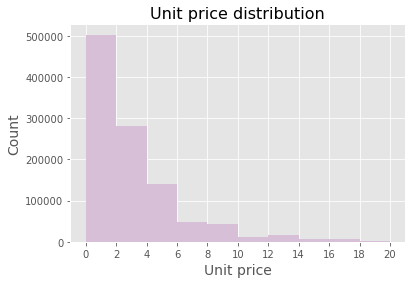

In [19]:
# Price distribution (exc. negative values)

bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df_retail, x='Price', bins=bins, color='thistle')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

'''The price for most of the products is equal or less than 10£'''

In [20]:
average_price = df_retail[df_retail['Price'] >= 0]['Price'].mean()

print(f"Average price after excluding negative values: £{average_price:.2f}")

Average price after excluding negative values: £4.80


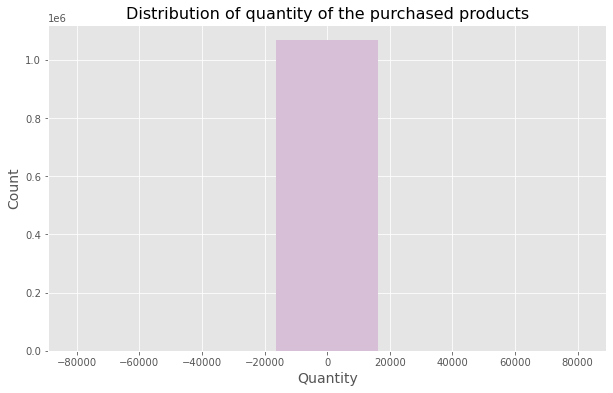

In [21]:
# Let's look at the quantity of the purchased products

plt.figure(figsize=(10,6))
plt.hist(data=df_retail, x='Quantity', color='thistle', bins = 5)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of the purchased products", fontsize=16)

plt.show();

In [22]:
df_retail['Quantity'].describe(percentiles=[.99])

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
50%      3.000000e+00
99%      1.000000e+02
max      8.099500e+04
Name: Quantity, dtype: float64

In [23]:
# Negative values by Quantity
neg_quantity = df_retail[df_retail['Quantity']<0]
neg_quantity.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [24]:
negative_values_count = (df_retail['Quantity'] < 0).sum()
print(f'Number of negative values in "Quantity" column: {negative_values_count}')
print("The percentage of records with negative values:", round(neg_quantity.shape[0]*100/df_retail.shape[0], 2), '%')

Number of negative values in "Quantity" column: 22950
The percentage of records with negative values: 2.15 %


'Generally, customers tend to purchase up to 50 items per order.'

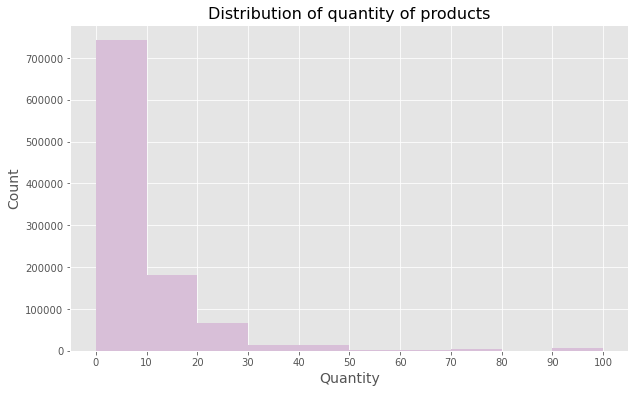

In [25]:
# Quantity distribution graph (exc. negative values)

bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.figure(figsize=(10, 6))
plt.hist(data=df_retail, x='Quantity', bins=bins, color='thistle')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity feature', fontsize=16);

'''Generally, customers tend to purchase up to 50 items per order.'''

In [26]:
average_order_number = df_retail[df_retail['Quantity'] >= 0]['Quantity'].mean()

print(f"Average number of quantity after excluding negative values: {average_order_number:.2f}")

Average number of quantity after excluding negative values: 11.18


### Period of time

The analysis demonstrates that the dataset encompasses a time frame from December 1st, 2009 to December 9th, 2011, indicating a coverage of a two-year period.

In [27]:
print('The earliest date is on', df_retail['InvoiceDate'].min())
print('The latest date is on', df_retail['InvoiceDate'].max())

The earliest date is on 2009-12-01 07:45:00
The latest date is on 2011-12-09 12:50:00


### Countries distribution

The dataset is heavily weighted towards the United Kingdom, with 93% of transactions. However, it is important to note that regression models are primarily concerned with predicting a continuous numerical target variable, such as CLV. Unlike classification tasks, where class imbalance can be a concern, regression models can handle the continuous nature of CLV, and the concept of class imbalance does not directly apply.

In [28]:
print('Total number of countries: ', df_retail['Country'].nunique())
print('Top 10 countries by number of transactions:')

top_countries = pd.DataFrame(df_retail['Country'].value_counts().head(10))
top_countries.reset_index(inplace=True)
top_countries.columns = ['Country', 'Counts']
top_countries['% Counts'] = round(top_countries['Counts'] /top_countries['Counts'].sum() * 100, 2)
top_countries

Total number of countries:  43
Top 10 countries by number of transactions:


,Country,Counts,% Counts
0,United Kingdom,981330,93.38
1,EIRE,17866,1.70
2,Germany,17624,1.68
3,France,14330,1.36
4,Netherlands,5140,0.49
5,Spain,3811,0.36
6,Switzerland,3189,0.30
7,Belgium,3123,0.30
8,Portugal,2620,0.25
9,Australia,1913,0.18


In [29]:
df_retail['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

## *2.5 Data Cleaning*

After reviewing our dataset, I've identified several data cleaning steps to prepare it for analysis and Customer Lifetime Value (CLV) prediction:

1. Handling Null Values: The `Customer ID` and `Description` columns contain null records. To calculate CLV, we require records for each customer. Therefore, I'll remove rows with NULL values in these columns. 

2. Change the data type of `Customer ID` to be object so it'd be easy for data preprocessing. 

3. Negative values on Quantities and Prices: The `Quantity` column has negative values, likely due to product returns, and the `Price` column also has negative records. I'll remove rows with negative quantities and negative prices, as these can affect our analysis.

4. I'll exclude the country that is unspecified.

5. Time Period: Our dataset covers purchases from December 1, 2009, to December 9, 2011. To round it we can start from 1 January 2010. 

In [9]:
def clean_data(df):
    # Drop null values
    df.dropna(axis=0, subset=['Description', 'Customer ID'], inplace=True)
    
    # Change data type of Customer ID to object
    df['Customer ID'] = df['Customer ID'].astype('str')
    
    # Keep rows with positive quantity values
    df = df[df['Quantity'] > 0]
    
    # Remove rows with negative price
    df = df[df['Price'] > 0]
    
    # Remove 'unspecified' from the 'Country' column
    df = df[df['Country'] != 'Unspecified']
    
    # Filter data for the year 2011
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df = df[(df['InvoiceDate'].dt.year >= 2010) & (df['InvoiceDate'].dt.year <= 2011)]
    
    return df


## *2.6 Feature Engineering*

In this section, I will make new features to engineer:

1. Calculate the `TotalPurchase`: The total amount spent by each customer, calculated by multiplying the quantity of each purchase by the price.
2. Calculate `recency` by determining the time gap in days between the current date and each customer's most recent purchase date.
3. Calculate `frequency` by counting the total number of orders made by each customer.
4. Calculate `monetary`: the sum of purchase amount for each customer.
6. Calculate `CLV`
   = ((Customer Value)/Churn Rate) x Profit Margin.
   
   Customer Value = Average Order Value * Purchase Frequency

   Profit Margin. It is like a business's happiness gauge. 
   It shows how much money you make from what you sell. Let's suppose that our retail business has roughly `7.5%` profit on total sales.
7. Customer Loyalty: The level of customer loyalty, based on the purchase frequency. For example, we could define five levels of customer loyalty: New Customer,  Regular Customer, Loyal, Very Loyal, Super Loyal.


In [10]:
def feature_engineered(df):
    # Calculate total purchase
    df['totalPurchase'] = df['Quantity'] * df['Price']

    # Group customer by their transactions
    df_group = df.groupby(['Customer ID', 'Country']).agg({
        'InvoiceDate': lambda date: (date.max() - date.min()).days,
        'Invoice': lambda num: len(num),
        'Quantity': lambda quant: quant.sum(),
        'totalPurchase': lambda price: price.sum()
    })
    df_group.columns = ['recency', 'frequency', 'numUnits', 'monetary']

    # Calculate Average Order Value
    df_group['avgOrderValue'] = df_group['monetary'] / df_group['frequency']

    # Calculate Purchase Frequency
    purchaseFrequency = sum(df_group['frequency']) / df_group.shape[0]

    # Calculate repeat rate, churn rate
    repeatRate = df_group[df_group['frequency'] > 1].shape[0] / df_group.shape[0]
    churnRate = 1 - repeatRate

    def customer_loyalty_category(frequency):
        if frequency == 1:
            return 'New Customer'
        elif 1 < frequency <= 5:
            return 'Regular Customer'
        elif 5 < frequency <= 10:
            return 'Loyal'
        elif 10 < frequency <= 20:
            return 'Very Loyal'
        else:
            return 'Super Loyal'
        
    df_group['CustomerLoyalty'] = df_group['frequency'].apply(customer_loyalty_category)

    df_group['profitMargin'] = df_group['monetary']*0.075

    # Calculate Customer Value
    df_group['custValue'] = (df_group['avgOrderValue'] * purchaseFrequency) / churnRate

    # Calculate CLV
    df_group['CLV'] = df_group['custValue'] * (df_group['monetary'] * 0.075)

    df_group = df_group.reset_index()

    return df_group

In [35]:
# clean our data first

df_retail = clean_data(df_retail)

In [36]:
# to proceed the feature engineering process
df_new = feature_engineered(df_retail)

In [37]:
df_new.head()

,Customer ID,Country,recency,frequency,numUnits,monetary,avgOrderValue,CustomerLoyalty,profitMargin,custValue,CLV
0,12346.0,United Kingdom,379,29,74259,77442.96,2670.446897,Super Loyal,5808.22200,1.896934e+07,1.101781e+11
1,12347.0,Iceland,402,253,3286,5633.32,22.266087,Super Loyal,422.49900,1.581656e+05,6.682481e+07
2,12348.0,Finland,362,51,2714,2019.40,39.596078,Super Loyal,151.45500,2.812680e+05,4.259945e+07
3,12349.0,Italy,570,175,1624,4428.69,25.306800,Super Loyal,332.15175,1.797651e+05,5.970930e+07
4,12350.0,Norway,0,17,197,334.40,19.670588,Very Loyal,25.08000,1.397287e+05,3.504395e+06


# **3. Exploratory Data Analysis (EDA)**

To avoid the risk of data leakage, it's better if we split our data before doing EDA.

In [38]:
df_copy = df.copy()

In [39]:
#split data before EDA
df_train, df_test = train_test_split(
    df_copy, test_size = 0.3, random_state = 87
)

In [40]:
df_train.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
350230,567619,20719,WOODLAND CHARLOTTE BAG,10,2011-09-21 12:28:00,0.85,15203.0,United Kingdom
427996,573407,23425,STORAGE TIN HOME SWEET HOME,6,2011-10-30 15:58:00,2.49,18067.0,United Kingdom
246939,558748,22383,LUNCH BAG SUKI DESIGN,10,2011-07-03 10:23:00,1.65,17800.0,United Kingdom
129854,501731,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,5,2010-03-19 11:07:00,0.85,16008.0,United Kingdom
314222,564573,21293,MIRRORED DOVE WALL DECORATION,2,2011-08-26 11:19:00,2.10,14606.0,United Kingdom


In [41]:
df_train = clean_data(df_train)

In [42]:
df_train = feature_engineered(df_train)

In [43]:
df_train.head()

,Customer ID,Country,recency,frequency,numUnits,monetary,avgOrderValue,CustomerLoyalty,profitMargin,custValue,CLV
0,12346.0,United Kingdom,379,19,74249,77373.84,4072.307368,Very Loyal,5803.03800,1.886112e+07,1.094518e+11
1,12347.0,Iceland,402,173,2338,3798.37,21.955896,Super Loyal,284.87775,1.016900e+05,2.896920e+07
2,12348.0,Finland,362,32,1523,1067.44,33.357500,Super Loyal,80.05800,1.544971e+05,1.236873e+07
3,12349.0,Italy,570,113,1051,2649.27,23.444867,Super Loyal,198.69525,1.085862e+05,2.157556e+07
4,12350.0,Norway,0,7,96,120.60,17.228571,Loyal,9.04500,7.979509e+04,7.217466e+05


## *3.1 Distribution Analysis*

After we splitted, cleaned, and engineered the data, the first thing we need to do is to examine the distribution between the features.

Shown by the p-value test and boxplot chart, all distribution data in each numerical features such as `recency`, `frequency`, `monetary`, `profitMargin`, `custValue`, and `CLV` are not normally distributed, backed up by violin chart that emphasise CLV in each countries. It means there are outliers, extreme values, or unusual customer behavior that represent customers with exceptionally high or low CLV, which can skew the distribution away from normality.

When we look at the customer loyalty feature, we see that we have more customers who are loyal to the company than new customers. It can be suggested that the Marketing team should be more invested in retention growth. 

In [44]:
df_num = ['recency', 'frequency', 'monetary', 'profitMargin','custValue', 'CLV']

In [45]:
# check data distribution

from scipy.stats import normaltest

cols= df_num
distribution=[]
for i in cols:
    stats, pval=normaltest(df_train[i])
    if pval>0.05:
        distribution.append('normal')
    else:
        distribution.append('not normal')
        
pd.DataFrame({'distribution':distribution},index=cols)

,distribution
recency,not normal
frequency,not normal
monetary,not normal
profitMargin,not normal
custValue,not normal
CLV,not normal


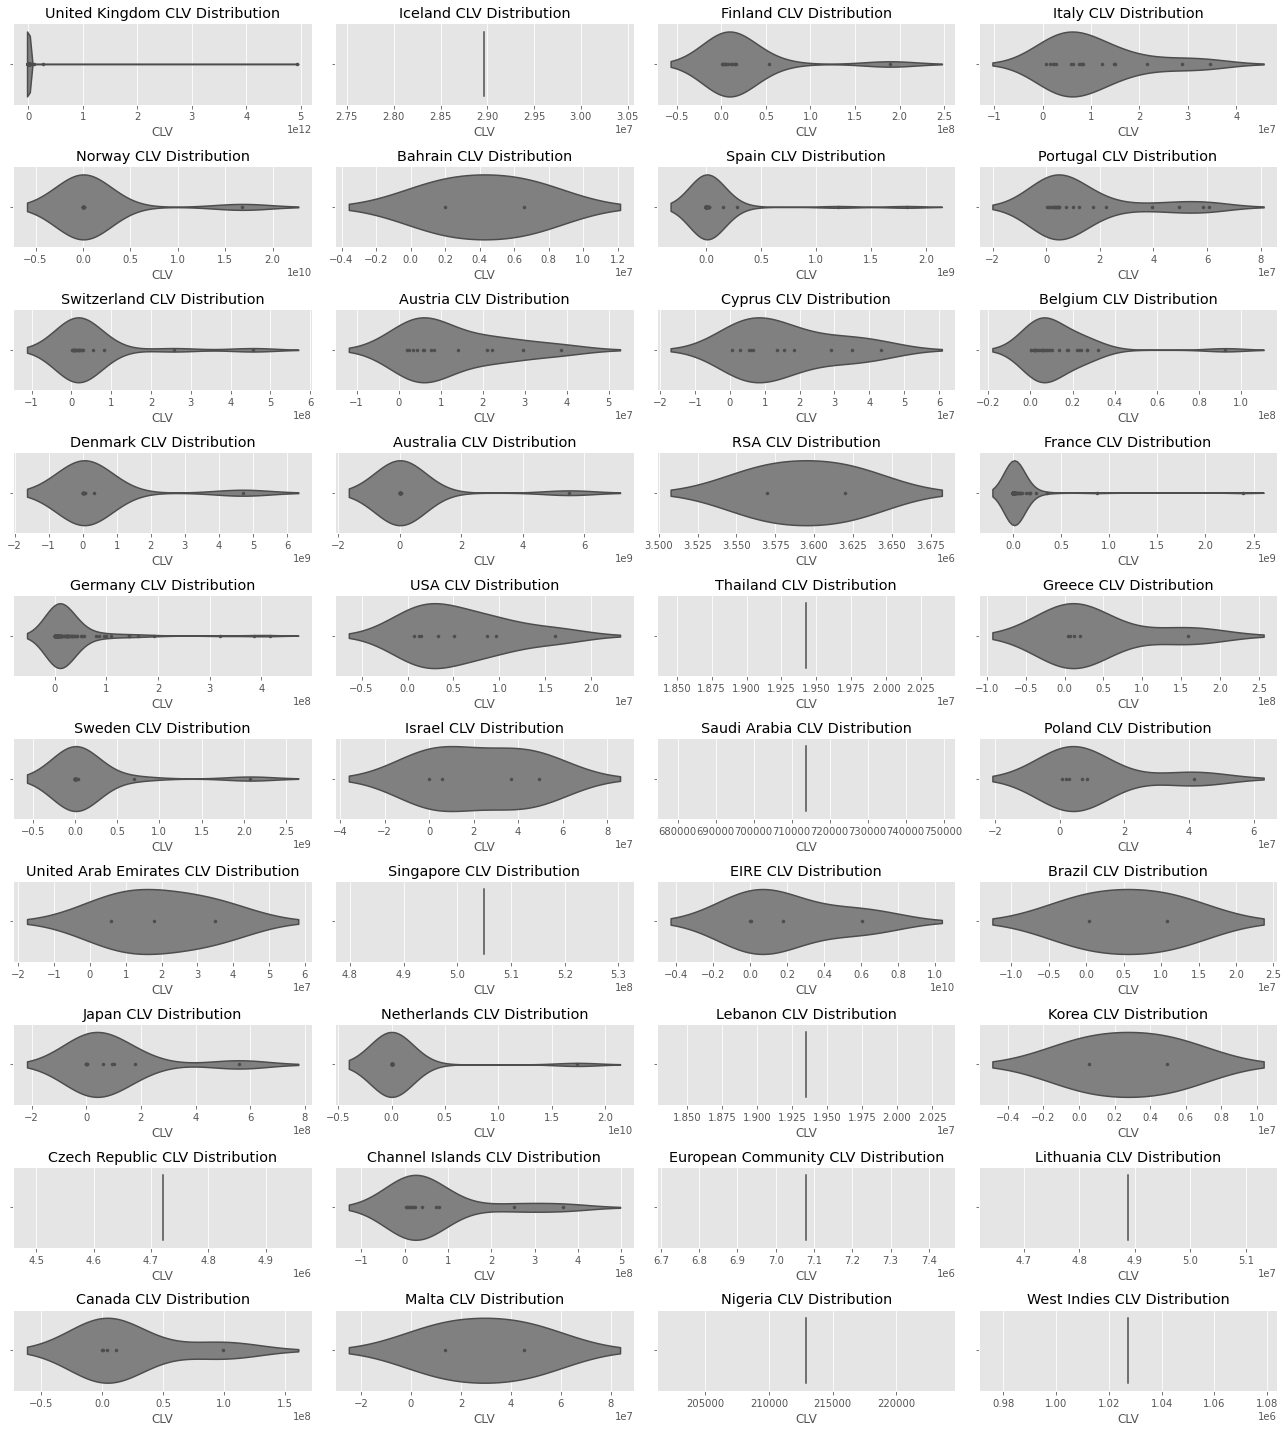

In [46]:
# Check data distribution for each country by the CLV value

country_names = df_train['Country'].unique()

fig, ax = plt.subplots(10, 4, figsize=(18, 20))

axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(country_names):
    if i < len(axes_):
        sns.violinplot(x='CLV', data = df_train[df_train['Country'] == c], 
                        ax =axes_[i], inner='point', palette='gray')
        axes_[i].set_title(c+' '+'CLV Distribution')
    else:
        break
    
    plt.tight_layout()


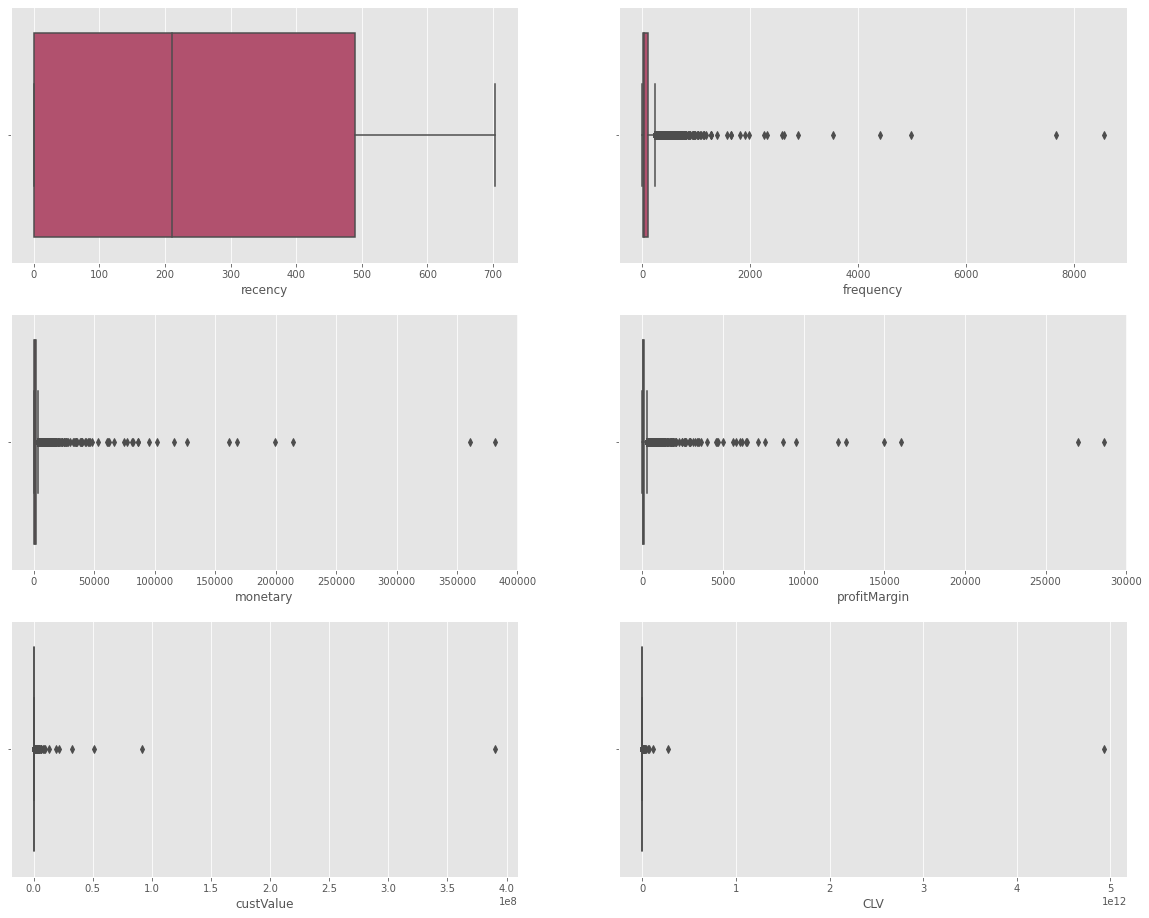

In [47]:
# Check outlier in each numerical features

fig, ax = plt.subplots(3, 2,figsize=(20,16))

for ix, num in enumerate(df_num):
    g = sns.boxplot(x = num, data = df_train, palette = 'flare', ax = ax.flatten()[ix])

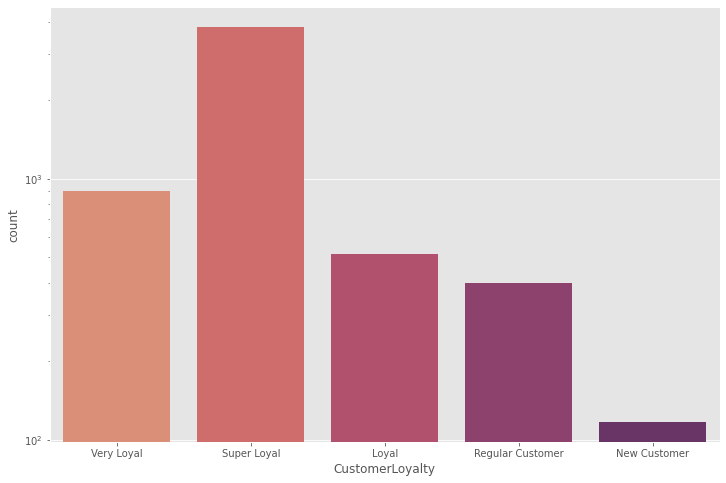

In [52]:
# Check CustomerLoyalty feature 

ctg_var = ['CustomerLoyalty']
fig, ax = plt.subplots(1,1, figsize=(12,8))

for ix, ctg in enumerate(ctg_var):
    g = sns.countplot(x = ctg, data = df_train, palette= 'flare', log = True)

## *3.2 Univariate Analysis*

If we want to see the correlations between numerical features, it is clear that we need to remove unnecessary features that have very low correlation to CLV. The features `avgOrderValue` and `custValue` have a strong correlation to CLV and will be selected as our features. Other features with a low correlation may still be related to CLV, but they will not be as informative. We will also remove the feature with a negative score because it is likely not statistically significant

In [49]:
# Univariate correlation
corr_matrix = df_train.corr()

print(corr_matrix['CLV'].sort_values(ascending=False))

CLV              1.000000
avgOrderValue    0.971454
custValue        0.971454
monetary         0.237224
profitMargin     0.237224
numUnits         0.183897
recency         -0.002612
frequency       -0.003771
Name: CLV, dtype: float64


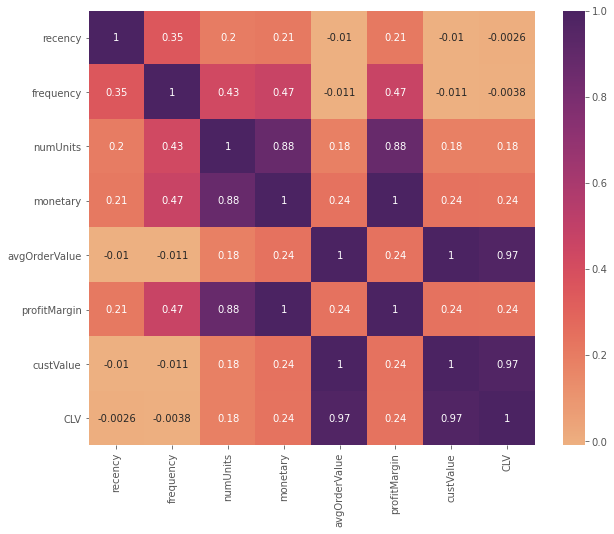

In [50]:
# heatmap of the correlation between numerical variables
plt.figure(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.show()

## *3.3 Bivariate Analysis*

We conducted a bivariate analysis using Cramer's chi-squared test to assess the impact of customer loyalty and country on CLV. Cramer's V is a non-parametric test for association between two categorical variables, more appropriate for CLV assessment.

Our findings revealed a weak association between customer loyalty and CLV (Cramer's V = 0.04). Similarly, the association between country and CLV is not statistically significant (Cramer's V = 0.06).

To simplify the model and enhance generalization, we may choose to exclude the country variable.

In summary, the bivariate analysis suggests that customer loyalty is a weak predictor of CLV. We'll retain customer loyalty as a feature because it still provides valuable insights into customer behavior.


In [51]:
# correlation matrix for categorical variable

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

df_categorical = df_train[['CustomerLoyalty', 'Country', 'CLV']]
corr_matrix = pd.DataFrame(index=df_categorical.columns, columns=df_categorical.columns)

for i in range(len(df_categorical.columns)):
    for j in range(len(df_categorical.columns)):
        corr_matrix.iloc[i, j] = cramers_v(df_categorical.iloc[:, i], df_categorical.iloc[:, j])

print(corr_matrix)


                CustomerLoyalty   Country       CLV
CustomerLoyalty             1.0       0.0  0.039355
Country                     0.0       1.0  0.061953
CLV                    0.039355  0.061953       1.0


## *3.4 EDA Conclusion*

Here is a summary of my findings from the exploratory data analysis:

1. All of the numerical features in the data are not normally distributed.
The features that I will use to predict CLV are: `avgOrderValue`, `profitMargin`, `custValue`, `customerLoyalty`.

2. Since the numerical data is not normally distributed and contains outliers, I will normalise it using Robust scaler. Robust scaler is a good choice for this task because it is less sensitive to outliers.

3. I will encode the categorical features using ordinal encoding for customerLoyalty. Ordinal encoding assigns integer labels to categories in a specified order.

4. Multicollinearity is a potential concern for linear regression models. To minimize the impact of multicollinearity, I will also explore two ensemble models, Random Forest and XGBoost, which are less sensitive to multicollinearity.


# **4. Data Preprocessing**

Next, data preprocessing plays a vital role in enhancing the quality and suitability of raw data for machine learning and analytical tasks. It encompasses a series of crucial steps, including data cleaning, feature engineering, scaling, encoding, and handling missing values, with the ultimate goal of improving model performance, interpretability, and robustness.

In [23]:
np.random.seed(88)

In [24]:
# reload data
retail_df = df.copy()

retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [25]:
retail_df = clean_data(retail_df)

In [26]:
retail_df = feature_engineered(retail_df)

In [27]:
retail_df.head()

,Customer ID,Country,recency,frequency,numUnits,monetary,avgOrderValue,CustomerLoyalty,profitMargin,custValue,CLV
0,12346.0,United Kingdom,379,29,74259,77442.96,2670.446897,Super Loyal,5808.22200,1.896934e+07,1.101781e+11
1,12347.0,Iceland,402,253,3286,5633.32,22.266087,Super Loyal,422.49900,1.581656e+05,6.682481e+07
2,12348.0,Finland,362,51,2714,2019.40,39.596078,Super Loyal,151.45500,2.812680e+05,4.259945e+07
3,12349.0,Italy,570,175,1624,4428.69,25.306800,Super Loyal,332.15175,1.797651e+05,5.970930e+07
4,12350.0,Norway,0,17,197,334.40,19.670588,Very Loyal,25.08000,1.397287e+05,3.504395e+06


In [28]:
# feature selection
selected_feature = ['avgOrderValue', 'profitMargin', 
                    'custValue','CustomerLoyalty']

# Separate features (columns 1 [Customer ID] to the last) and target (the last column)
X = retail_df.loc[:, selected_feature].values
y = retail_df[retail_df.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=88)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 4057 rows
Test Set: 1739 rows


In [29]:
# Define numerical features
numeric_features = ['avgOrderValue', 'profitMargin', 
                    'custValue']

# Define categorical features
categorical_features = ['CustomerLoyalty']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
                ('imputer', IterativeImputer()),
                ('scaler', RobustScaler())
                ])

categorical_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder())
         ])

preprocessor = ColumnTransformer([
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ], remainder='passthrough')

In [30]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['avgOrderValue', 'profitMargin',
                                  'custValue']),
                                ('cat',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['CustomerLoyalty'])])

In [31]:
# training set after preprocessing
X_train_df = pd.DataFrame(X_train, columns=selected_feature)
preprocessor.fit(X_train_df)
X_train_prep = preprocessor.transform(X_train_df)

In [32]:
X_train_prep = pd.DataFrame(X_train_prep, columns=selected_feature)
X_train_prep.head()

,avgOrderValue,profitMargin,custValue,CustomerLoyalty
0,0.295165,0.188670,0.295165,3.0
1,-0.163727,-0.059524,-0.163727,3.0
2,-0.942790,-0.388324,-0.942790,3.0
3,-0.051504,0.139157,-0.051504,3.0
4,-0.363286,-0.392695,-0.363286,4.0


In [33]:
# test set after preprocessing
X_test_df = pd.DataFrame(X_test, columns=selected_feature)
X_test_prep = preprocessor.transform(X_test_df)
X_test_prep = pd.DataFrame(X_test_prep, columns=selected_feature)
X_test_prep.head()

,avgOrderValue,profitMargin,custValue,CustomerLoyalty
0,-0.148376,-0.342322,-0.148376,4.0
1,-0.638678,-0.356084,-0.638678,3.0
2,-1.096783,-0.377839,-1.096783,3.0
3,-0.425442,0.002735,-0.425442,3.0
4,0.447130,-0.351420,0.447130,0.0


# **5. Evaluation Models**

Both RMSE and MedAE suggest that Random Forest performs the best among the three models, as it has the lowest error scores in both metrics.
XGBoost comes in second place, with a slightly higher MedAE than Random Forest but still better than Linear Regression.
Linear Regression has the highest RMSE and MedAE, indicating that it's the least accurate of the three models.


In [34]:
# The three models predictions
linear_regression = LinearRegression()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()

linear_regression.fit(X_train_prep, y_train)
random_forest.fit(X_train_prep, y_train)
xgboost.fit(X_train_prep, y_train)

linear_regression_predictions = linear_regression.predict(X_test_prep)
random_forest_predictions = random_forest.predict(X_test_prep)
xgboost_predictions = xgboost.predict(X_test_prep)

# Calculate the RMSE and MedAE for each model
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_predictions))
linear_regression_medae = median_absolute_error(y_test, linear_regression_predictions)

random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
random_forest_medae = median_absolute_error(y_test, random_forest_predictions)

xgboost_rmse = np.sqrt(mean_squared_error(y_test, xgboost_predictions))
xgboost_medae = median_absolute_error(y_test, xgboost_predictions)

print("Linear regression RMSE:", linear_regression_rmse)
print("Linear regression MEDAE:", linear_regression_medae)

print("Random forest RMSE:", random_forest_rmse)
print("Random forest MEDAE:", random_forest_medae)

print("XGBoost RMSE:", xgboost_rmse)
print("XGBoost MEDAE:", xgboost_medae)

Linear regression RMSE: 7330678472.329086
Linear regression MEDAE: 1492280572.2025692
Random forest RMSE: 478602397.5965351
Random forest MEDAE: 61749.81349167833
XGBoost RMSE: 461233418.2828816
XGBoost MEDAE: 681637.3866948243


# **6. Hyperparameter Tuning**

Based on the scores provided, it seems like Median Absolute Error (MedAE) is indeed a more appropriate metric to consider than Root Mean Squared Error (RMSE) for evaluating our Customer Lifetime Value (CLV) prediction model because MedAE is less sensitive to outliers compared to RMSE. Given that there are some extreme outliers in our CLV values, using MedAE can provide a more robust measure of prediction accuracy.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the RandomizedSearchCV object
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=88), param_grid, 
                               scoring='neg_median_absolute_error', cv=5, n_iter=100)

# Fit the model
rf_search.fit(X_train_prep, y_train)

# Get the best hyperparameters
best_params = rf_search.best_params_
print('Best hyperparameters for Random Forest:', best_params)

# Evaluate the model on the test set
rf_test_score = rf_search.score(X_test_prep, y_test)
print('Random Forest test score (MedAE):', -rf_test_score)


Best hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Random Forest test score (MedAE): 63199.890293966746


## *6.1 MEDAE & RMSE Score*

It seems that the Median Absolute Error (MedAE) score has increased from 63,199 to 61,691 after tuning. This suggests that the model's predictions were already accurate even before tuning. Therefore, we will stick with the standard model tuning.

Meanwhile, the RMSE score is approximately 478,602,397. The RMSE score is significantly higher than the MedAE because it accounts for the squared differences between predicted and actual values. This tendency to amplify the impact of large errors might be influencing the higher RMSE score.

Training MEDAE: 24483.898254474625
Training RMSE: 24902260196.557247
Test MEDAE: 61691.915477413684
Test RMSE: 415294289.59817356


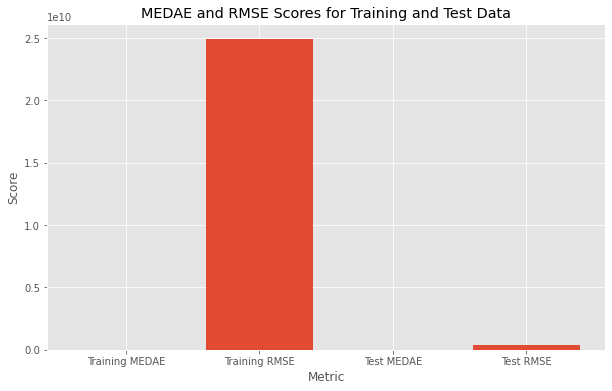

In [39]:
# Train the Random Forest regressor model with the standard parameters
model_new = RandomForestRegressor()
model_new.fit(X_train_prep, y_train)

# Make predictions on the training and test sets
y_train_pred = model_new.predict(X_train_prep)
y_test_pred = model_new.predict(X_test_prep)

# Calculate the MEDAE and RMSE scores for the training and test sets
train_medae = median_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_medae = median_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Training MEDAE:', train_medae)
print('Training RMSE:', train_rmse)
print('Test MEDAE:', test_medae)
print('Test RMSE:', test_rmse)

# Visualize the MAE and RMSE scores for the training and test sets
plt.figure(figsize=(10, 6))
plt.bar(['Training MEDAE', 'Training RMSE', 'Test MEDAE', 'Test RMSE'], [train_medae, train_rmse, test_medae, test_rmse])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('MEDAE and RMSE Scores for Training and Test Data')
plt.show()

In [40]:
# Check maximum value of CLV on training data
y_train.max()

5040414215080.204

In [41]:
# Check maximum value of CLV on testing data
y_test.max()

46177957508.96912

## *6.2 MedAE Score on training set and test set*

As observed below, the MEDAE on the training set is significantly lower than that on the test set, which can likely be attributed to the fact that the training set contains data that closely aligns with the patterns and characteristics the model was trained on. Conversely, the test set may include more diverse or previously unseen data, resulting in higher error rates during evaluation.

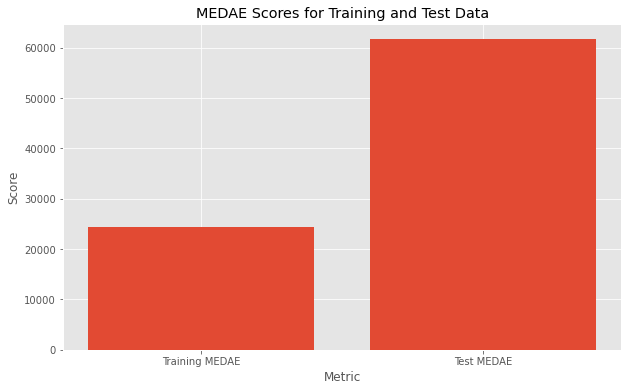

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(['Training MEDAE', 'Test MEDAE'], [train_medae, test_medae])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('MEDAE Scores for Training and Test Data')
plt.show()

## *6.3 MedAE Score PREDICTIONs vs ACTUALS*

Observing the line graph below, the blue line represents the actual CLV scores, while the red dots represent the predictions on the test set. Given the close alignment of the red dots with the blue line, we can confidently conclude that our predictions exhibit high accuracy.

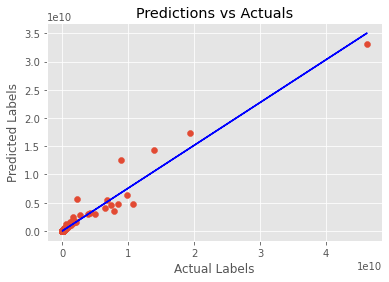

In [43]:
# Plot predicted vs actual
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='blue')
plt.show()

# **7. Model Interpretability**

To get an idea of which features are the most important for a model, we can plot the SHAP values for each feature for each sample.

In the graph below, with a different visualization concept, this plot not only sorts the features based on the total SHAP value across all samples but also uses the SHAP values to show the impact of each feature's distribution on the model output. Further details can be seen below:

- The set of points forming the colors are the points we obtain from each observational data.
- Blue color represents observational data with low values.
- Red color represents observational data with high values.


In [ ]:
pip install shap

 98%|===================| 1708/1739 [00:46<00:00]        

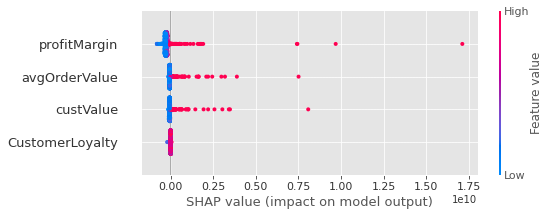

In [49]:
import shap

explainer = shap.Explainer(model_new, X_train_prep)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_prep)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test_prep)

## *7.1 SHAP Analysis*

Based on the results of the SHAP analysis, we can make the following clear conclusions:

- A higher profit margin leads to a larger CLV.
- A higher average order value is associated with a larger CLV.
- Higher customer value has a direct positive impact on CLV.
- Increased customer loyalty leads to a larger CLV.

# **8. Model Deployment**

After evaluating and fine-tuning our model, it's time to save the model and deploy it with new data.

In line with our objectives of categorizing customer segments based on their CLV values, I've classified them into three distinct segments using if-else statements:

- High-value (top 20%)
- Medium-value (next 60%)
- Low-value (bottom 20%)

In [51]:
import joblib

# Save the model as a pickle file
filename = './clv_model2.pkl'
joblib.dump(model_new, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction
X_new = np.array([[1500, 32700, 15934000000, 3],
                  [200, 60, 1349, 0]])

results = loaded_model.predict(X_new)

# Define percentiles for labeling based on the predictions
high_percentile = 0.2
low_percentile = 0.8

# Calculate the CLV percentiles from your predictions
clv_percentiles = np.percentile(results, [low_percentile * 100, high_percentile * 100])

# Define a function to categorize CLV
def categorize_clv(clv_value):
    if clv_value >= clv_percentiles[1]:
        return 'High-Value'
    elif clv_percentiles[0] <= clv_value < clv_percentiles[1]:
        return 'Medium-Value'
    else:
        return 'Low-Value'

# Categorize CLV predictions
clv_categories = [categorize_clv(prediction) for prediction in results]

# Your code for predicting CLV values
for prediction, category in zip(results, clv_categories):
    rounded_prediction = round(prediction, 2)
    print(f'CLV Prediction: {rounded_prediction}, Category: {category}')


CLV Prediction: 1730888451218.94, Category: High-Value
CLV Prediction: 147268255438.11, Category: Low-Value


# **9. Conclusion and Recommendation**



## *9.1 Conclusion*

Based on the performance of the machine learning models that have been developed, it is found that the RandomForestRegressor model performs remarkably well, producing a Median Absolute Error (MedAE) value of approximately 61,000. This signifies a very small error, especially when considering that the nominal range in the target CLV spans up to 46,177,957,508. The model's prediction speed typically ranges from 2 to 3 seconds for 2000-5000 data points, indicating fast processing.

The model we have created has successfully achieved two primary objectives:
1. Predicting the CLV of each customer based on their previous transaction data. This enables the marketing team to allocate their marketing campaign budget effectively, especialy for increasing retention rates.

2. Categorizing customers into three segments: high-value, medium-value, and low-value, based on the predicted CLV. This allows the marketing team to easily determine which segment to target with their campaigns during specific periods, especially if their goal is to increase customer retention.

For instance, if the marketing team is given a limited budget to create a campaign aimed at improving customer retention rates, the CLV predictions provide a list of customers categorized as either High-value or Medium-value. In this way, the marketing team can conduct campaigns within budget given with higher ROI as a possible result. Without CLV predictions, the marketing team would execute campaigns without suitable targets, potentially leading to budget inefficiency.

## *9.2 Recommendations*

### Ways to Improve Project Performance and Model Accuracy:

1. Enhance the database system within the application or website to automatically store customer activities. This aims to reduce missing values or negative values in real-time features such as Customer ID, Invoice Date, Quantity, Price, etc.
2. Explore alternative ML algorithms that may offer improved performance or reattempt hyperparameter tuning on the selected model, especially during seasonal campaigns, such as significant discounts during holiday seasons.
3. Conduct a deeper data analysis to identify other factors influencing CLV, such as season, time of order, etc.

### Recommendations Based on Feature Importance Analysis:

1. Allocate marketing budgets more effectively by identifying high CLV customers and paying attention to other factors after doing a deep analysis. For example, most high-value customers make orders and transactions in Q4 before the Christmas holidays.
2. Identify product or service categories that are particularly influential in increasing CLV. Promote upselling and cross-selling strategies for products within these categories to boost CLV for a given customer.
3. Develop customer loyalty programs based on the SHAP value analysis. For instance, the marketing team can create loyalty programs that reward customers whom making high-profit-margin purchases and increasing average order values.
4. Evaluate the impact of different marketing channels and campaigns using SHAP values. Adjust the marketing strategy to invest more in channels that have a higher influence on CLV and reduce expenditure on less impactful channels.
5. Regularly assess the effectiveness of marketing campaigns and customer segmentations. For example, gather feedback from customers to understand their preferences and further fine-tune marketing strategies.
6. Continue to improve the machine learning models by retraining them with new data. As customer behavior and market dynamics change, updated models can provide more accurate predictions and recommendations.


----

# **THANK YOU**